   calories  distance  duration start_time  end_time  steps  avg_pace  \
0       524      7076      2411   09:05:08  09:45:20   5682      0.34   
1       566      7113      2432   18:21:54  19:02:27   5829      0.34   
2       510      7001      3648   16:10:51  16:52:05   5476      0.52   
3       286      4033      1299   08:48:44  09:11:26   3224      0.32   
4       500      6915      2294   17:27:49  18:06:35   5809      0.33   
5       526      7159      2339   08:39:34  09:18:34   5937      0.33   
6       496      6504      2172   18:03:26  18:44:30   5482      0.33   
7       521      7139      2321   08:34:02  09:13:08   5980      0.33   
8       533      7148      2375   08:15:14  08:54:52   5991      0.33   
9       560      7097      2252   08:06:56  08:44:36   5636      0.32   

  data_training   temp  pressure  
0    2023-04-16   8.50   1016.70  
1    2023-04-16  13.24   1018.35  
2    2023-04-17  13.90   1022.20  
3    2023-04-19   7.24   1017.20  
4    2023-04-19  12.1

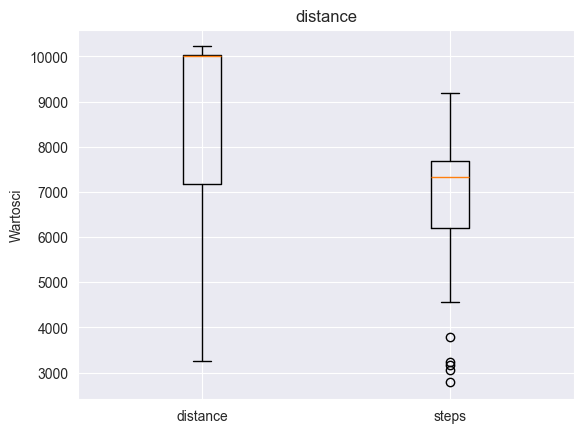

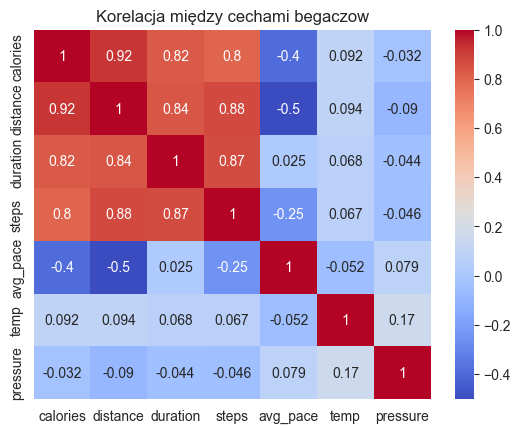

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.Support.path import get_path_df

# zaladowanie pliku csv z danymi
df = pd.read_csv(get_path_df([''], 'bob.csv'))

# pierwsze 10 wierszy 
print(df.head(10))


# Sredni calorii, temperatura, temp, trwalosc, dystans
avg_values = {
           "Avg calories" : df['calories'].mean(),
           "Avg temperatura" : df['temp'].mean(),
           "Avg pace" : df['avg_pace'].mean(),
           "Avg duration" : df['duration'].mean(),
           "Avg distance" : df['distance'].mean()
       }
avg_values = {key: int(value) for key, value in avg_values.items()}
print("Srednie znaczenia w calkowitych liczbach: \"calorii, temperatura, temp, trwalosc, dystans\" -", [i for i in avg_values.values()])

#mediana temperatury
print("Mediana temperatury: ", df['temp'].median())

#Histogram
#print(plt.hist(df['temp']))

# Srednie dystansu oraz krokow
print("Srednia dystansu: ", int(df['distance'].mean()))
print("Srednia krokow: ", int(df['steps'].mean()))

# Min i Max dystansu i krokow
print("Max dystans: ", df['distance'].max())
print("Min dystans: ", df['distance'].min())

print("Max krokow: ", df['steps'].max())
print("Min krokow: ", df['steps'].min())

# Mediana distance oraz steps
print("Mediany dystansu oraz krokow: ", df['distance'].median(),",", df['steps'].median())


# Quantyle 0.25, 0.5, 0.75
quantiles_distance = df['distance'].quantile([0.25, 0.5, 0.75])
quantiles_steps = df['steps'].quantile([0.25, 0.5, 0.75])
print("Quantyle rzendu 1 - 3 dla dystansu:\n", quantiles_distance)
print("Quantyle rzendu 1 - 3 dla krokow:\n", quantiles_steps)

# Boxplot cech distance oraz steps
x = np.array(df['distance'])
y = np.array(df['steps'])

plt.boxplot([x, y])
plt.xticks([1, 2], ['distance', 'steps'])
plt.title("distance")
plt.ylabel("Wartosci")
plt.show()


# Wspolczynnik korelacji
columns_names = ['calories','distance','duration','start_time',
                 'end_time','steps','avg_pace','data_training','temp','pressure']

df.columns = columns_names

numeric_columns = df.select_dtypes(include = ['float64', 'int64'])

corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelacja między cechami begaczow')
plt.show()